In order to keep plots for each set of data, copy this notebook for each set of data

### Parameters

In [59]:
import warnings
#to suppress seaborn palette warnings
warnings.filterwarnings("ignore", category=UserWarning)
#to suppress seaborn error estimation NaN warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)



import os

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import loader
import analysis_functions

#to suppress pandas reassignment false positive warnings
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
csv_directory = 'C:\\Users\\swind\\Documents\\lab_work\\Barth\\behavior_analysis\\Eunsol_data\\all_animals'
analysis_directory = 'C:\\Users\\swind\\Documents\\lab_work\\Barth\\behavior_analysis\\Eunsol_data\\refactor_4h'
metadata_file = 'C:\\Users\\swind\\Documents\\lab_work\\Barth\\behavior_analysis\\Eunsol_data\\eunsol_metadata.xlsx'

condition_name = 'SAT'
# animal_name = ''

acc_col_name = 'acc'
default_acc_time = 2 # days
time_bin = 240 # minutes

# using rolling window
freq_window = 300 # milliseconds
freq_bin = 100 # milliseconds

last_percent = 20
min_trials = 0
min_water_trials = 0
min_blank_trials = 0

### Load Files

Directory Structure:

> ```
> all_conditions\
> |--- condition_1\
>      |--- animal_1\
>           |--- temptest.txtmm_dd_yy_T_HH_MM_SS.txt
>      |--- animal_2\
>      |--- etc.
> |--- condition_2\
>      |--- animal_1\
>      |--- animal_2\
>      |--- etc.
> |--- condition_3\
> |--- etc.
> ```

In [4]:
metadata = pd.read_excel(metadata_file)

#### Run one of the three following cells based on total data available (comment out the other two)

In [5]:
# this will load all conditions in a directory of multiple conditions
df = []
for d in os.listdir(csv_directory):
    cond = loader.make_condition_df(csv_directory +'\\' + d, d, metadata, acc_col_name, default_acc_time)
    df.append(cond)
df = pd.concat(df)

NKZ4: no metadata
NLB1: no metadata


In [6]:
# this will load one condition
# df = loader.make_condition_df(csv_directory, condition_name, metadata, acc_col_name, default_acc_time)

In [7]:
# this will load one animal
# df = loader.make_animal_df(csv_directory, metadata, animal_name, acc_col_name, default_acc_time)
# df["condition"] = condition_name

### Lick Frequency Analysys

In [8]:
data = analysis_functions.lickfreq_analysis(df, freq_window, freq_bin, time_bin)

### Bout Analysis

2 min bout length based on visual investigation of raster plots of 
individual animals trial distributions

In [9]:
data = analysis_functions.get_bouts(data, ["animal"], "timestamp", "bout no", 2, "min")

### Previous trial identity

Uses bouts to only look at previous trials within a certain time frame. 
Only look at 5 previous trials since bouts are on average 5 trials long

In [10]:
trial_ind = ["animal", "trial no"]
bout_ind = ["animal", "bout no"]
key = "stimulus"
n = 5
cond0 = "stimulus"
cond1 = "blank"
data = analysis_functions.get_n_back(data, trial_ind, bout_ind, key, n, cond0, cond1)

In [11]:
prev_stim = data[data["1_back"] == "stimulus"]
prev_blank = data[data["1_back"] == "blank"]

#### Aggregate values

In [54]:
# temporary

data = data[data["animal"] != "OSA12"]

In [55]:
mean_statistics, counts, performance = analysis_functions.aggregate_analysis(data, min_trials, min_blank_trials, min_water_trials)

c:\Users\swind\Documents\lab_work\Barth\behavior_analysis\mouse_analysis\users\rswind\analysis_functions.py:179: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[cond]
c:\Users\swind\Documents\lab_work\Barth\behavior_analysis\mouse_analysis\users\rswind\analysis_functions.py:184: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[total_counts[col] > min_trials]


In [15]:
ps_stats, ps_counts, ps_perf = analysis_functions.aggregate_analysis(prev_stim, min_trials, min_blank_trials, min_water_trials)
pb_stats, pb_counts, pb_perf = analysis_functions.aggregate_analysis(prev_blank, min_trials, min_blank_trials, min_water_trials)

c:\Users\swind\Documents\lab_work\Barth\behavior_analysis\mouse_analysis\users\rswind\analysis_functions.py:179: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[cond]
c:\Users\swind\Documents\lab_work\Barth\behavior_analysis\mouse_analysis\users\rswind\analysis_functions.py:184: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[total_counts[col] > min_trials]
c:\Users\swind\Documents\lab_work\Barth\behavior_analysis\mouse_analysis\users\rswind\analysis_functions.py:179: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[cond]
c:\Users\swind\Documents\lab_work\Barth\behavior_analysis\mouse_analysis\users\rswind\analysis_functions.py:184: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[total_counts[col] > min_trials]


In [ ]:
ps_stats

,condition,animal,delta,stimulus,water,trial no,age,sex,strain,acc,Time (hr)
16,SAT,GKO6,-2 days +08:00:00,blank,no water,23,31.0,M,Sscre x Ai32,2 days,-40.0
17,SAT,GKO6,-2 days +08:00:00,stimulus,water,80,31.0,M,Sscre x Ai32,2 days,-40.0
78,SAT,GKO6,-2 days +12:00:00,blank,no water,15,31.0,M,Sscre x Ai32,2 days,-36.0
79,SAT,GKO6,-2 days +12:00:00,stimulus,water,64,31.0,M,Sscre x Ai32,2 days,-36.0
142,SAT,GKO6,0 days 00:00:00,blank,no water,4,31.0,M,Sscre x Ai32,2 days,0.0
...,...,...,...,...,...,...,...,...,...,...,...
50937,mcherry_cno,NIO16,0 days 08:00:00,stimulus,water,85,26.0,M,SSTcre,1 days,8.0
51018,mcherry_cno,NIO16,0 days 12:00:00,blank,no water,10,26.0,M,SSTcre,1 days,12.0
51019,mcherry_cno,NIO16,0 days 12:00:00,stimulus,water,19,26.0,M,SSTcre,1 days,12.0
51094,mcherry_cno,NIO16,0 days 16:00:00,blank,no water,4,26.0,M,SSTcre,1 days,16.0


In [17]:
total_trials = counts.groupby(["condition", "animal", "Time (hr)"])["trial no"].sum().reset_index()

### Plots

In [ ]:
# Question: does behavior differ based on the identity of previous trials?

In [ ]:
%matplotlib inline

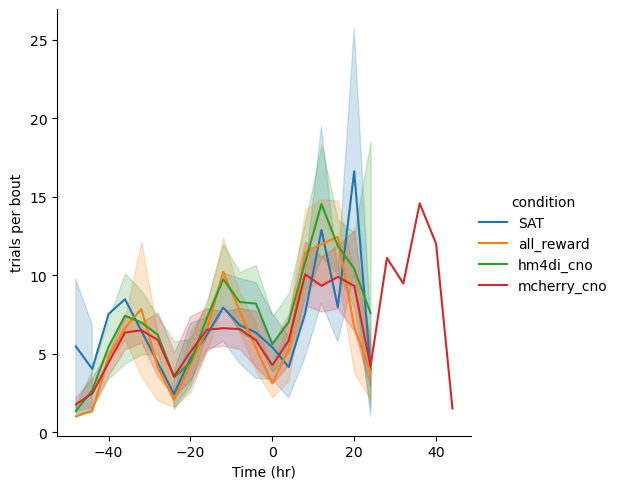

In [18]:
# number of trials per bout over time
f = data.groupby(["condition", "animal", "Time (hr)", "bout no", "trial no"]).first()
c = f.groupby(["condition","animal", "Time (hr)", "bout no"]).count()
m = c.groupby(["condition", "animal", "Time (hr)"]).mean().reset_index()
m = m[m["condition"] != "dcz_05"]
g = sns.relplot(data=m, x="Time (hr)", y="lick", hue="condition", kind="line")
g.set(ylabel="trials per bout")    

In [47]:
%matplotlib widget

(-0.5, 1.5)

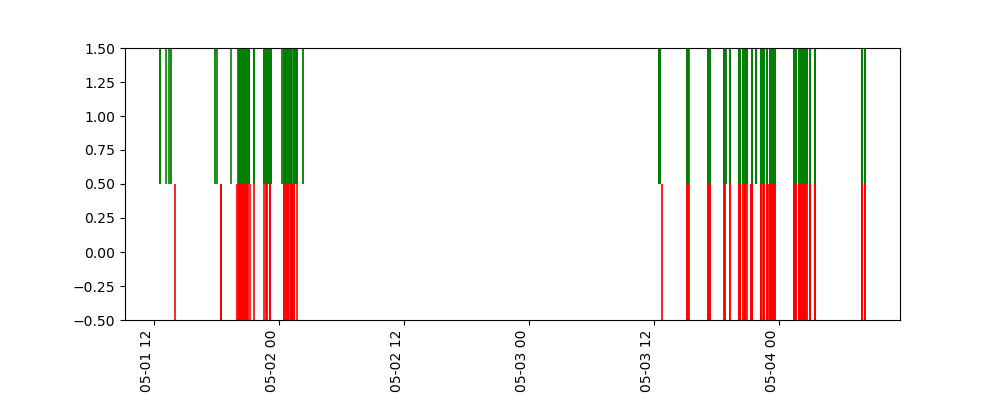

In [ ]:
# raster for one animal
gko6 = data[data["animal"] == "GKO6"]
gps = []
for gname, gp in gko6.groupby(["stimulus"]):
    gps.append(gp["timestamp"])

fig, ax = plt.subplots(1, 1, figsize=(10,4))
c = ["red", "green"]

lo = [0,1]
lw = 0.1
ll = 1
#ticks = mpl.ticker.MultipleLocator(base=1.0)
ax.eventplot(positions=gps, colors=c, lineoffsets=lo, linewidths=lw, linelengths=ll)
#ax.xaxis.set_major_locator(mpl.dates.MinuteLocator(interval=60))  
#ax.xaxis.set_minor_locator(mpl.dates.MinuteLocator(interval=5))  
fig.autofmt_xdate(rotation=90)
ax.set_ylim([-0.5,1.5])


In [51]:
%matplotlib inline
plt.clf()

<Figure size 640x480 with 0 Axes>

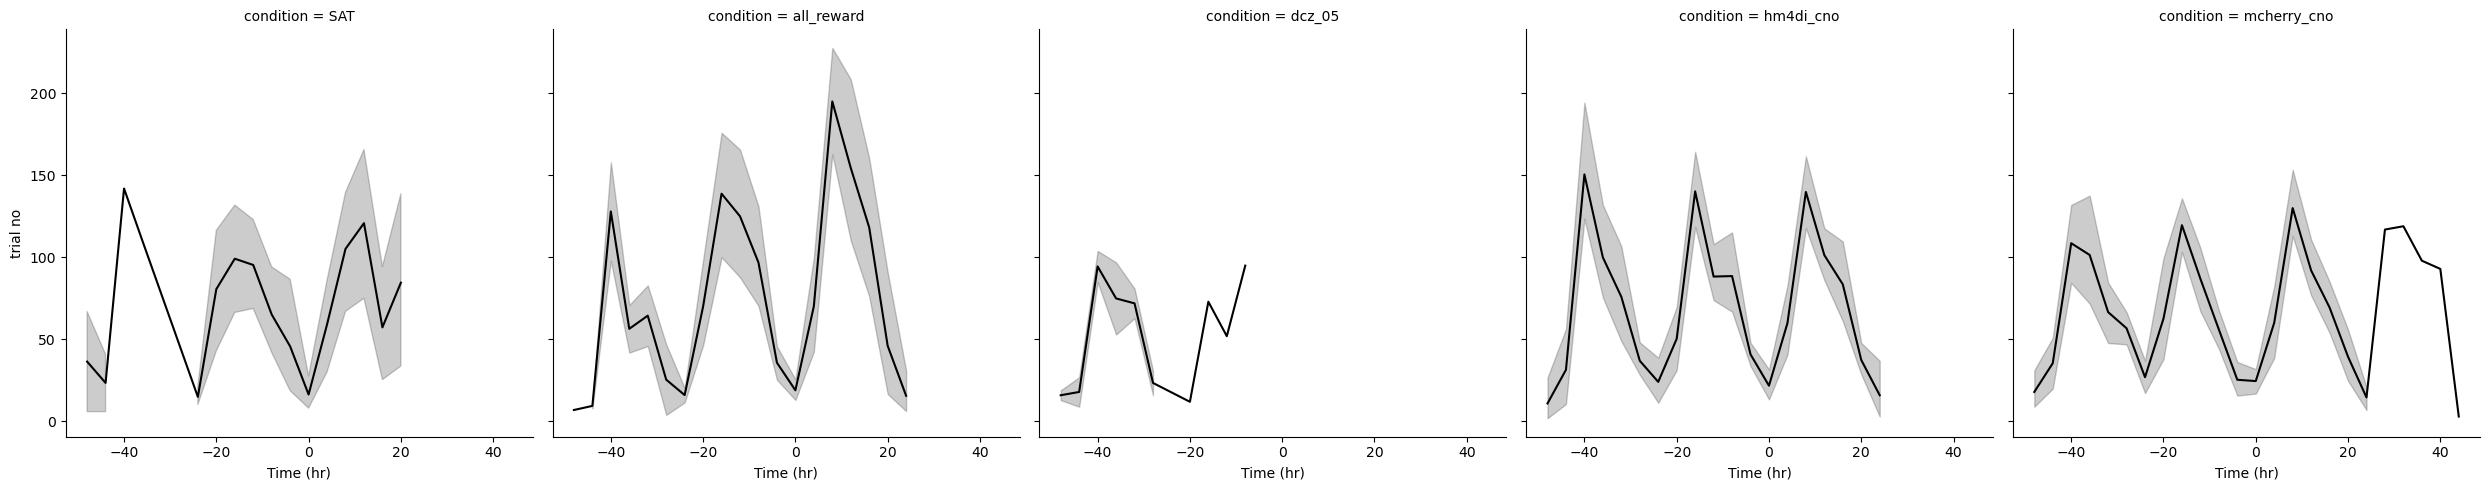

In [52]:
# number of trials over time

cond = total_trials["animal"] != "OSA12"
sns.relplot(data=total_trials[cond], x="Time (hr)", y="trial no", kind="line", color='k', col="condition")

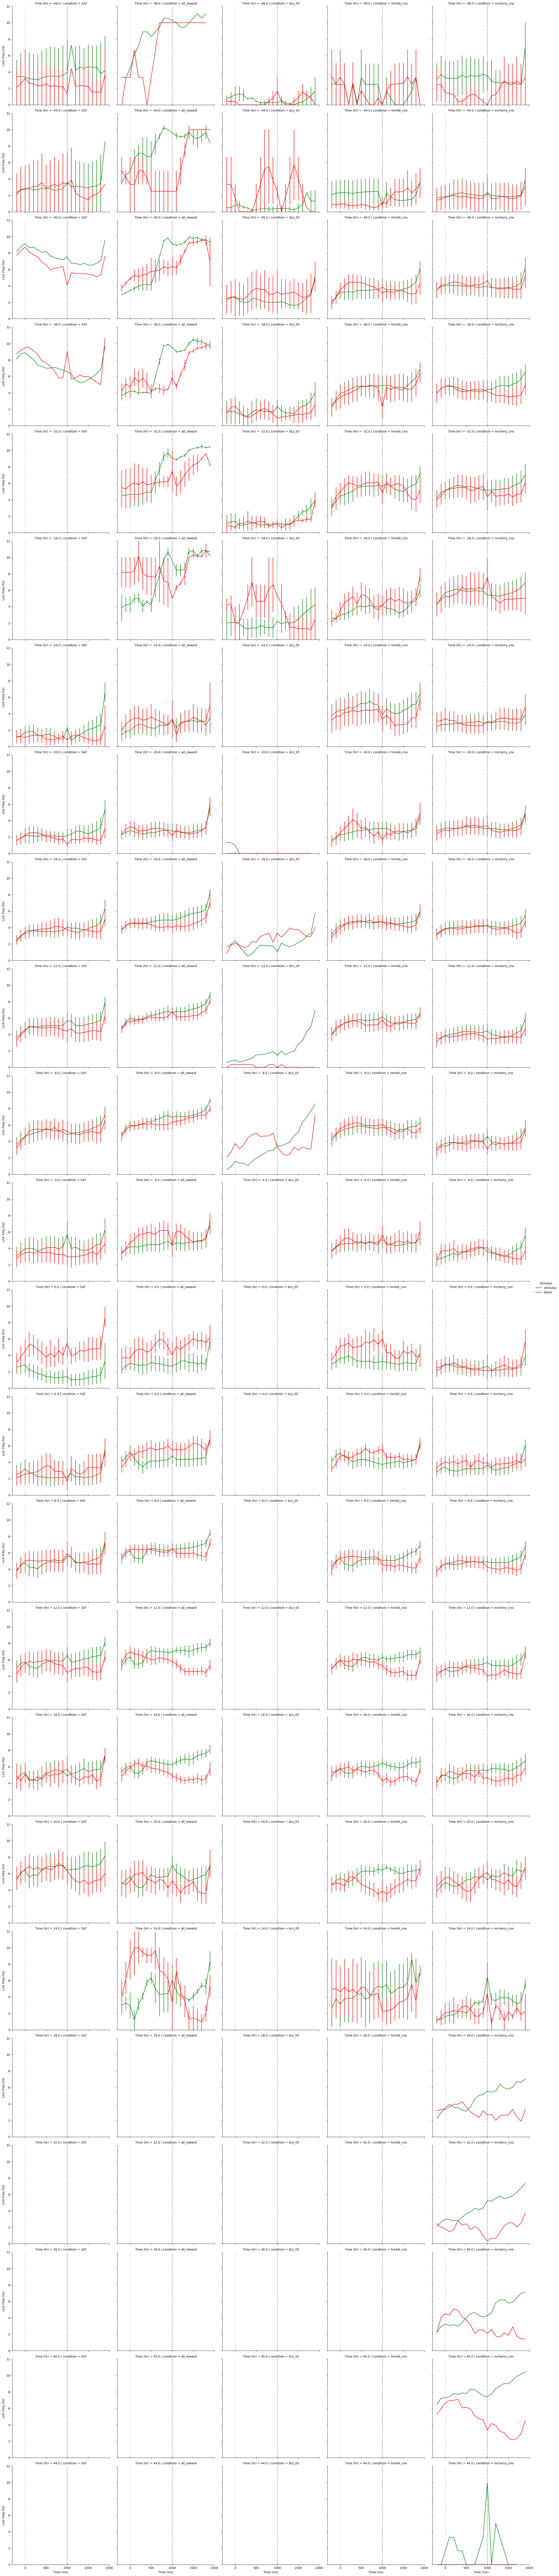

In [61]:
# lick frequency

# plot all timebins average performance trace on the same plot
g = sns.relplot(data=mean_statistics,kind="line",x="Time (ms)", y="lick",col="condition", row="Time (hr)",
                hue="stimulus", palette=["green", "red"], hue_order=["stimulus", "blank"], errorbar="se",err_style="bars", legend="full")


# add lines at air puff and water delivery
for ax in g.axes.flat:
    ax.axhline(y=0, xmin=0, xmax=1, ls="-", lw=0.75,color="black", zorder=0)
    ax.axvline(x=0, ymin=0, ymax=1, ls="--", color="lightgrey", zorder=0)
    ax.axvline(x=1000, ymin=0, ymax=1, ls="--", color="navy", alpha=0.5, zorder=0)
    ax.set_ylim([0, 12])
    ax.set_ylabel("Lick Freq (hz)")


c:\Users\swind\miniconda3\envs\behavior\Lib\site-packages\matplotlib\axes\_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
c:\Users\swind\miniconda3\envs\behavior\Lib\site-packages\matplotlib\axes\_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
c:\Users\swind\miniconda3\envs\behavior\Lib\site-packages\matplotlib\axes\_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
c:\Users\swind\miniconda3\envs\behavior\Lib\site-packages\matplotlib\axes\_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])
c:\Users\swind\miniconda3\envs\behavior\Lib\site-packages\matplotlib\axes\_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
c:\Users\swind\miniconda3\envs\behavior\Lib\site-packages\matplotlib\axes\_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nan

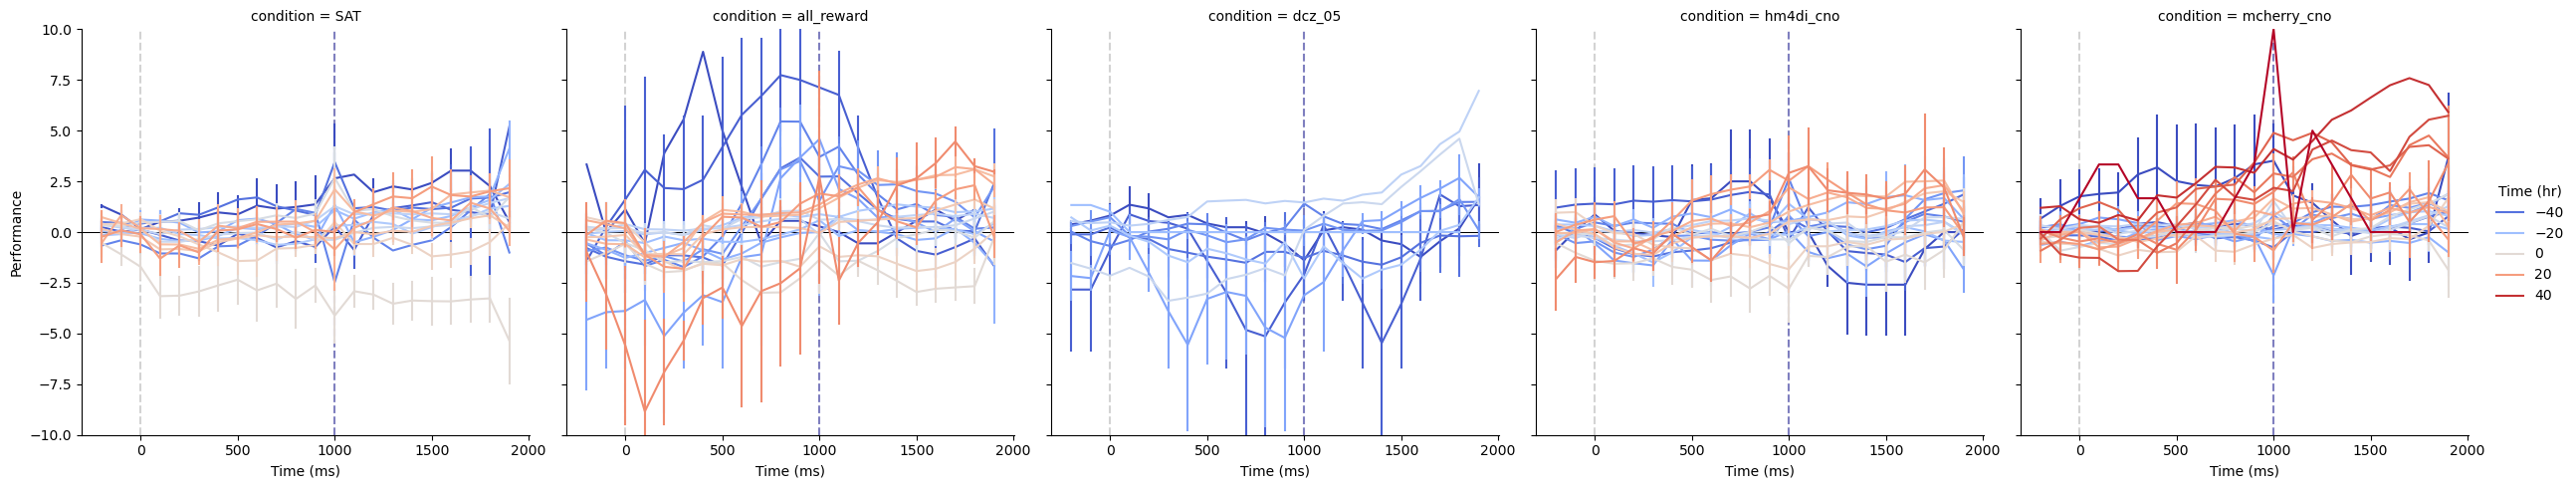

In [56]:
# performance across trial (all timebins in one plot)

g = sns.relplot(data=performance, kind="line",x="Time (ms)", y="lick",col="condition", 
                hue="Time (hr)", palette="coolwarm", errorbar="se",err_style="bars", legend="brief")

# add lines at air puff and water delivery
for ax in g.axes.flat:
    ax.axhline(y=0, xmin=0, xmax=1, ls="-", lw=0.75,color="black", zorder=0)
    ax.axvline(x=0, ymin=0, ymax=1, ls="--", color="lightgrey", zorder=0)
    ax.axvline(x=1000, ymin=0, ymax=1, ls="--", color="navy", alpha=0.5, zorder=0)
    ax.set_ylim([-10, 10])
    ax.set_ylabel("Performance")

#### Output Results 

In [ ]:
# TODO: output raw data
# TODO: output parameters as metadata 

'''
output_dir = f'{analysis_directory}/{condition_name}/stats/{condition_name}'
output_prev = f'{analysis_directory}/{condition_name}/prev_stats/{condition_name}'

cols = ["condition", "sex", "age", "strain", "animal", "stimulus", "Time (hr)", "Time (ms)", "lick"]
mean_statistics.to_csv(f'{output_dir}_lick_frequency.csv', columns=cols, index=False)

cols = ["condition", "sex", "age", "strain", "animal", "Time (hr)", "Time (ms)", "trial no"]
counts.to_csv(f'{output_dir}_trial_counts.csv', columns=cols, index=False)

cols = ["condition", "sex", "age", "strain", "animal", "Time (hr)", "Time (ms)", "lick"]
performance.to_csv(f'{output_dir}_performance.csv', columns=cols, index=False)
'''

#### Pipeline description

__Pipeline:__

>```
>raw data (csv) ------------|    loader.py                                                     lickfreq_analysis                                            
>                            |------------------> formatted data - many animals (dataframe) ---------------------------> trial-level analysis(dataframe)
>metadata (excel) ----------|
>
>                                     aggregate_analysis   |---> trial number counts by timebin and condition (dataframe) ---|
>trial-level analysis (dataframe) ------------------------|---> mean lick frequency by timebin (dataframe) -----------------|---> plots
>                                                          |---> performance by timebin (dataframe) -------------------------|
>```

***

__Formats__

*raw data*

>time (ms), poke, lick, condition code, delay, stimulus

- time measured from start of file
- poke in {0, 1}
- lick in {0, 2}
- condition code in {3, 4, 5, 7, 9}
    - 3 = delay
    - 4 = air delivery
    - 5 = water delivery
    - 7 = after water delivery
    - 9 = blank
- 200 <= delay <= 800
- stimulus in {0, 1}
    - stimulus not present in SAT code
    - stimulus present and relevant in pseudo code

*metadata*

- excel
- must include 'Animal ID' (3 letter + number animal code)
- must include 'acc' (time of acclimation in days)
- other example columns: age, sex, strain

*formatted data*

>timestamp, poke, lick, condition code, delay, trial no, water, stimulus, animal, condition, metadata

- metadata can be multiple columns

*trial-level analysis*
> condition, animal, trial no, puff delta, trial start, timestamp, metadata, stimulus, water, lick, poke, delta, time (hr), time (ms)

- puff delta is equivalent to time (ms)
    - represents timestamp normalized to air delivery
    - puff delta is timedelta and time (ms) is float
- trial start represents timebin as timestamp
- delta is equivalent to time (hr)
    - represents timebin normalized to start of stat
    - delta is timedelta and time (hr) is float
- metadata can be multiple columns
- lick and poke now represent frequencys aggregated based on given window size

